In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results_12_15a.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [2]:
from betacal import BetaCalibration
from  scipy.stats import beta


In [3]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]


In [8]:
pos = pos_3
subneg = np.random.choice( neg_3, 1*sum(gold3))
p_test = tp3
y_test = M_test3['golds']

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\optimize\_optimize.py:72: RuntimeWarning: overflow encountered in exp
  fg = self.fun(x, *args)


{'pred_probs': array([0.44774473, 0.47361673, 0.52518265, 0.57558369, 0.624813  ,
        0.67563429, 0.72561191, 0.77423366, 0.82524766, 0.87434318,
        0.91334687]),
 'emp_probs': array([0.        , 0.00141343, 0.00312744, 0.00823353, 0.00537222,
        0.00678733, 0.00854701, 0.01768607, 0.01458173, 0.03306392,
        0.03407155]),
 'bin_counts': array([  68., 1415., 1279., 1336., 1303., 1326., 1404., 1357., 1303.,
        1361.,  587.])}

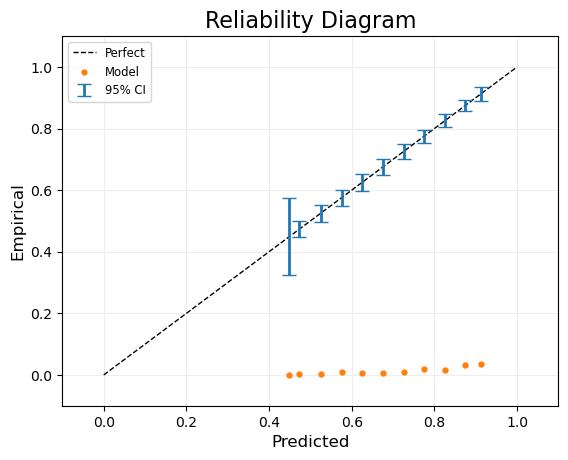

In [9]:
 
a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
synth_pos = np.random.beta(a,b,size = int( len(pos)*2.5 ))
many_pos = np.concatenate((pos, synth_pos))
probs = np.concatenate((subneg, many_pos))
subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

spline = mli.SplineCalib()
spline.fit(probs, subgold)
spline_test = spline.predict(p_test) 

mli.plot_reliability_diagram(y_test,  spline_test)


In [10]:
from matplotlib.pyplot import figure 


In [13]:
def spl_smote(pos, subneg, p_test, y_test, 
               synth_size):
        
    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

    spline = mli.SplineCalib()
    spline.fit(probs, subgold)
    spline_test = spline.predict(p_test) 
    figure (figsize=(2.5,2.5))

    mli.plot_reliability_diagram(y_test,  spline_test)


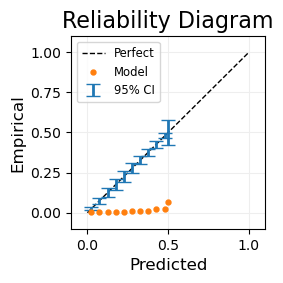

In [14]:
spl_smote(pos_2, subneg=np.random.choice(neg_2, 5*sum(gold2)),
           p_test = tp2, y_test= M_test2['golds'],   synth_size=2)

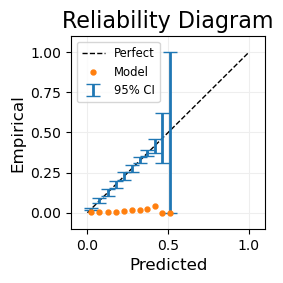

In [20]:
spl_smote(pos_2, subneg=np.random.choice(neg_2, 12*sum(gold2)),
           p_test = tp2, y_test= M_test2['golds'],   synth_size=3.25)

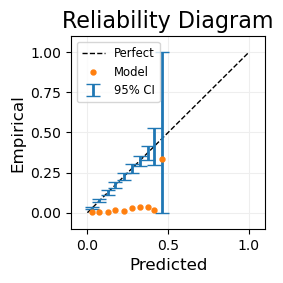

In [35]:
spl_smote(pos_3, subneg=np.random.choice(neg_3, 12*sum(gold3)),
           p_test = tp3, y_test= M_test3['golds'],   synth_size=1.25)

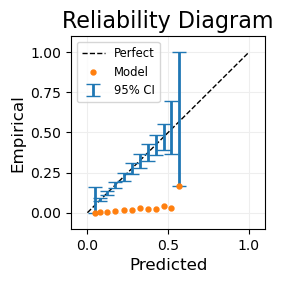

In [41]:
spl_smote(pos_4,  np.random.choice(neg_4, 17*sum(gold4)),
           p_test = tp4, y_test= M_test4['golds'],   synth_size=2.75)

In [ ]:
pos = pos_2
p_test = tp2
y_test = M_test2['golds']
subneg = np.random.choice( neg_2, 10*sum(gold2))
 

In [82]:
def beta_fun(pos, subneg, p_test, y_test):

    boot = np.concatenate((subneg, pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , 1*np.ones(len(pos)    ) ) )
    bc = BetaCalibration()
    bc.fit(boot, subgold)
    beta_test = bc.predict(p_test)

    #mli.plot_reliability_diagram( subgold , boot, error_bars=False);
    #tvec = np.linspace(.01, .99, 99)
    #plt.plot(tvec, bc.predict(tvec))
    mli.plot_reliability_diagram(y_test,  beta_test);

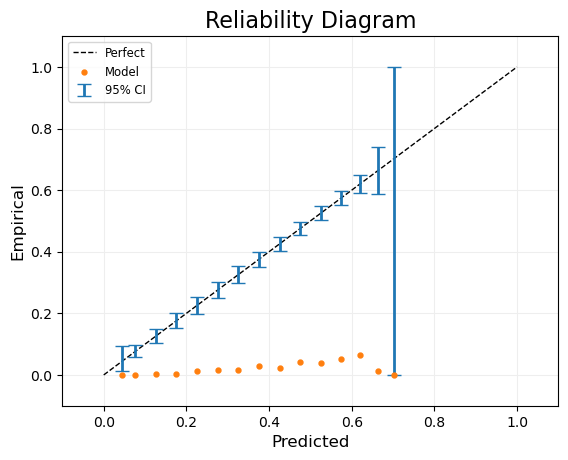

In [97]:
beta_fun(pos_1, np.random.choice(neg_1, int(1.34*sum(gold1))),  tp1, M_test1['golds'])

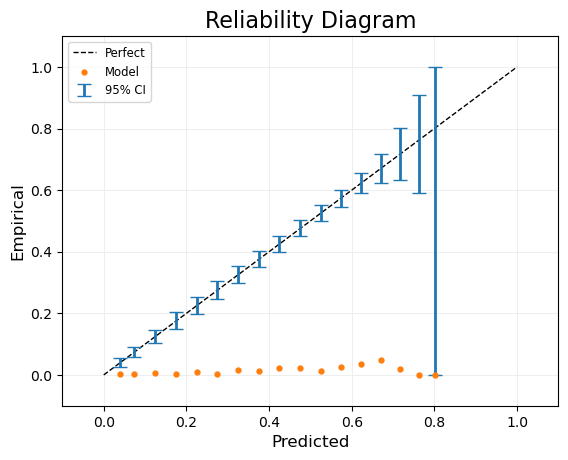

In [99]:
beta_fun(pos_2, np.random.choice(neg_2, int(1.5*sum(gold2))),  tp2, M_test2['golds'])

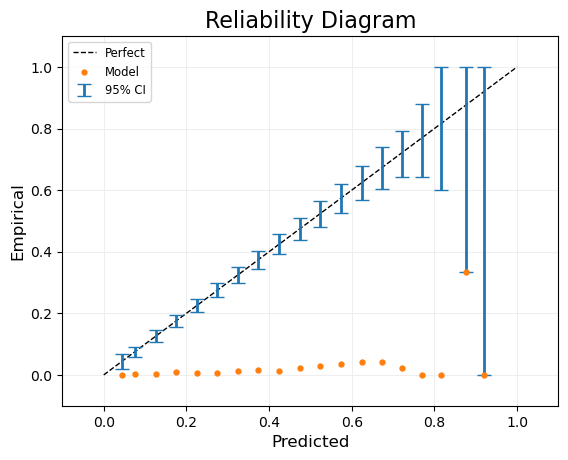

In [103]:
beta_fun(pos_3, np.random.choice(neg_3, int(2*sum(gold3))),  tp3, M_test3['golds'])

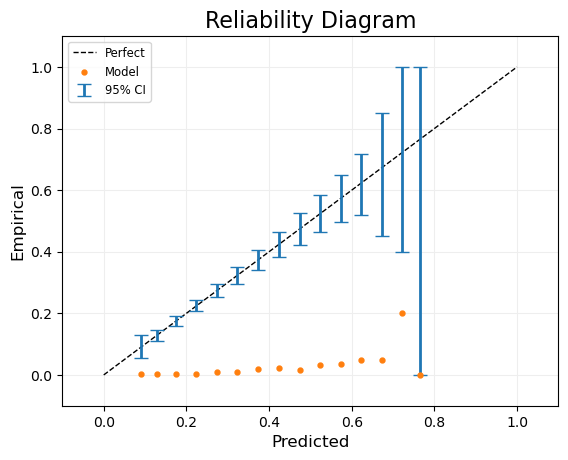

In [106]:
beta_fun(pos_4, np.random.choice(neg_4, int(2.5*sum(gold4))),  tp4, M_test4['golds'])

In [ ]:
iso =  IsotonicRegression(out_of_bounds = 'clip')
iso.fit(   (boot1), subgold1)
iso_prob = iso.predict(    (tp1))
#iso2 =isotonic2 ( logit(boot1),  subgold1,   logit(tp1) )

custom_bins_a = np.array([0,.01,.02,.03,.05, .1, .3, .5, .75, 1])

mli.plot_reliability_diagram( M_test1['golds'] ,  ( iso_prob), scaling = 'logit', 
                             bins = custom_bins_a);
tvec = np.linspace(.01, .99, 99)
#plt.plot(tvec, iso.predict( (tvec)), label='Isotonic');
plt.title('Isotonic Calibration Curve on Calibration Data');
